In [1]:
import ENDFtk

# Carrega o arquivo JENDL
tape = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')

# Acessa o material
material = tape.material(2631)

# Lista os MTs disponíveis no MF=3
#available_mts = material.file(3).sections
for material in tape.materials:
    print('MAT {}'.format(material.MAT))
    for file in material.files:
        print('MF {}'.format(file.MF))
        for section in file.sections:
            print('MT {}, {} lines'.format(section.MT,section.NC))
 

MAT 2631
MF 1
MT 451, 497 lines
MF 2
MT 151, 320 lines
MF 3
MT 1, 3810 lines
MT 2, 3810 lines
MT 4, 203 lines
MT 16, 7 lines
MT 22, 8 lines
MT 28, 7 lines
MT 51, 191 lines
MT 52, 13 lines
MT 53, 12 lines
MT 54, 22 lines
MT 55, 20 lines
MT 56, 17 lines
MT 57, 17 lines
MT 58, 16 lines
MT 59, 16 lines
MT 60, 16 lines
MT 61, 15 lines
MT 62, 15 lines
MT 63, 15 lines
MT 64, 14 lines
MT 65, 14 lines
MT 66, 14 lines
MT 67, 13 lines
MT 68, 13 lines
MT 69, 12 lines
MT 70, 12 lines
MT 71, 12 lines
MT 72, 11 lines
MT 73, 11 lines
MT 74, 11 lines
MT 75, 10 lines
MT 76, 10 lines
MT 77, 10 lines
MT 91, 9 lines
MT 102, 27 lines
MT 103, 16 lines
MT 107, 11 lines
MT 203, 17 lines
MT 207, 11 lines
MF 4
MT 2, 641 lines
MT 51, 101 lines
MT 52, 93 lines
MT 53, 93 lines
MT 54, 93 lines
MT 55, 21 lines
MT 56, 20 lines
MT 57, 20 lines
MT 58, 20 lines
MT 59, 20 lines
MT 60, 20 lines
MT 61, 20 lines
MT 62, 20 lines
MT 63, 20 lines
MT 64, 20 lines
MT 65, 20 lines
MT 66, 20 lines
MT 67, 20 lines
MT 68, 20 lines
MT

In [4]:
import ENDFtk

# Carrega o arquivo JENDL
tape = ENDFtk.tree.Tape.from_file('Fe056_tendl.endf')

# Acessa o material
material = tape.material(2631)

# Lista os MTs disponíveis no MF=3
#available_mts = material.file(3).sections
for material in tape.materials:
    print('MAT {}'.format(material.MAT))
    for file in material.files:
        print('MF {}'.format(file.MF))
        for section in file.sections:
            print('MT {}, {} lines'.format(section.MT,section.NC))
 

MAT 2631
MF 1
MT 451, 699 lines
MF 2
MT 151, 320 lines
MF 3
MT 1, 889 lines
MT 2, 888 lines
MT 3, 888 lines
MT 4, 164 lines
MT 5, 14 lines
MT 11, 5 lines
MT 16, 11 lines
MT 17, 8 lines
MT 22, 12 lines
MT 24, 7 lines
MT 28, 11 lines
MT 29, 7 lines
MT 32, 8 lines
MT 33, 7 lines
MT 34, 7 lines
MT 41, 7 lines
MT 44, 8 lines
MT 45, 7 lines
MT 51, 164 lines
MT 52, 32 lines
MT 53, 30 lines
MT 54, 29 lines
MT 55, 28 lines
MT 56, 27 lines
MT 57, 27 lines
MT 58, 26 lines
MT 59, 25 lines
MT 60, 25 lines
MT 61, 24 lines
MT 62, 24 lines
MT 63, 23 lines
MT 64, 23 lines
MT 65, 22 lines
MT 66, 22 lines
MT 67, 22 lines
MT 68, 21 lines
MT 69, 21 lines
MT 70, 20 lines
MT 71, 20 lines
MT 72, 19 lines
MT 73, 19 lines
MT 74, 18 lines
MT 75, 18 lines
MT 76, 18 lines
MT 77, 17 lines
MT 78, 17 lines
MT 79, 17 lines
MT 80, 16 lines
MT 91, 16 lines
MT 102, 155 lines
MT 103, 19 lines
MT 104, 12 lines
MT 105, 11 lines
MT 106, 11 lines
MT 107, 130 lines
MT 108, 10 lines
MT 111, 10 lines
MT 112, 10 lines
MT 115, 9 l

⚠️ MT 41 não disponível no JENDL: map::at
⚠️ MT 42 não disponível no JENDL: map::at
⚠️ MT 44 não disponível no JENDL: map::at
⚠️ MT 45 não disponível no JENDL: map::at
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
⚠️ MT 111 não disponível no JENDL: map::at
⚠️ MT 115 não disponível no JENDL: map::at
⚠️ MT 116 não disponível no JENDL: map::at
[error] The requested section (MF3 MT111) is not present in the ENDF file tree
[error] The requested section (MF3 MT115) is not present in the ENDF file tree
[error] The requested section (MF3 MT116) is not present in the ENDF file tree


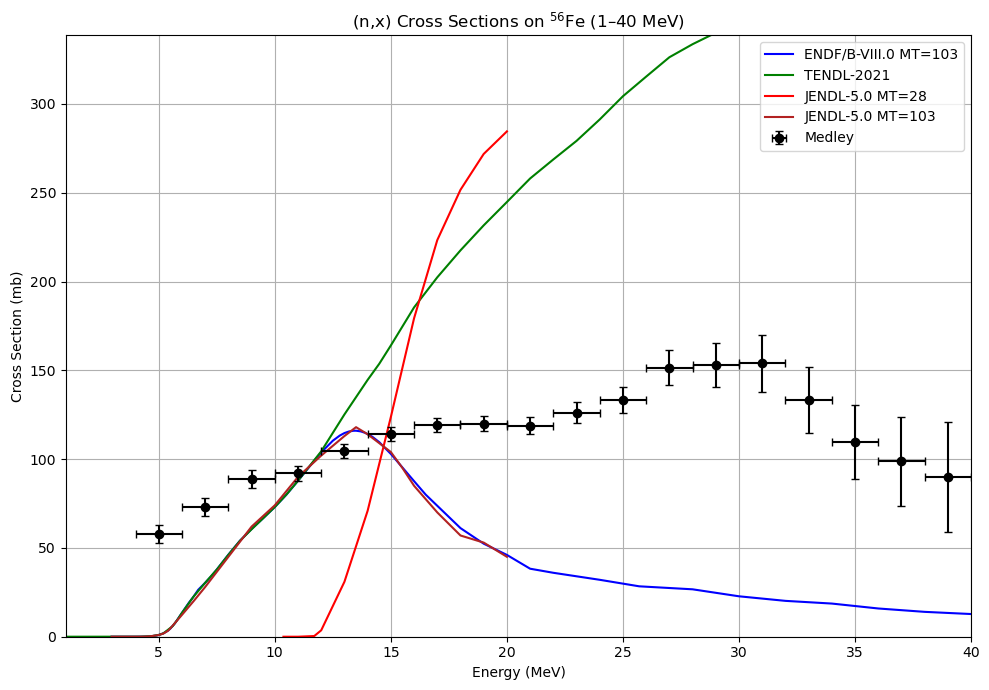

In [2]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt

# === ENDF/B-VIII.0 ===
endf_path = '../ENDF-B-VIII.0_neutrons/n-026_Fe_056.endf'
tape_endf = ENDFtk.tree.Tape.from_file(endf_path)
section_endf = tape_endf.material(2631).file(3).section(103).parse()
energies_en = np.array(section_endf.energies)       # eV
cross_sections_en = np.array(section_endf.cross_sections)  # barns
mask_en = (energies_en >= 1e6) & (energies_en <= 4e7)

# === TENDL (arquivo pprod.tot) ===
data_tendl = []
with open('pprod.tot', 'r') as f:
    for line in f:
        line = line.strip()
        if line.startswith('#') or len(line) == 0:
            continue
        parts = line.split()
        if len(parts) >= 2:
            E = float(parts[0])      # MeV
            xs = float(parts[1])     # mb
            data_tendl.append((E, xs))
data_tendl = np.array(data_tendl)
energies_tendl = data_tendl[:, 0]
cross_sections_tendl = data_tendl[:, 1]

# === JENDL-5.0 ===
tape_jendl = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')
mt_list = [28, 41, 42, 44, 45, 103, 111, 115, 116]
colors_jendl = ['red', 'darkorange', 'seagreen', 'navy', 'purple', 'firebrick', 'teal', 'brown', 'gray']

# === Medley experimental data ===
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
ex = np.ones_like(x)  # ±1 MeV
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])  # mb

# === Plotagem ===
plt.figure(figsize=(10, 7))

# ENDF
plt.plot(energies_en[mask_en]*1e-6, cross_sections_en[mask_en]*1e3, label='ENDF/B-VIII.0 MT=103', color='blue')

# TENDL
plt.plot(energies_tendl, cross_sections_tendl, label='TENDL-2021', color='green')

# JENDL MTs
for mt, color in zip(mt_list, colors_jendl):
    try:
        section = tape_jendl.material(2631).file(3).section(mt).parse()
        energies = np.array(section.energies) * 1e-6  # MeV
        xs = np.array(section.cross_sections) * 1e3   # mb
        mask = (energies >= 1) & (energies <= 40)
        plt.plot(energies[mask], xs[mask], label=f'JENDL-5.0 MT={mt}', color=color)
    except Exception as e:
        print(f"⚠️ MT {mt} não disponível no JENDL: {e}")

# Medley
plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o', color='black', label='Medley', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title(r'(n,x) Cross Sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*2.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


[error] The requested section (MF3 MT28) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
[error] The requested section (MF3 MT112) is not present in the ENDF file tree
[error] The requested section (MF3 MT115) is not present in the ENDF file tree
[error] The requested section (MF3 MT116) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
[error] The requested section (MF3 MT111) is not present in t

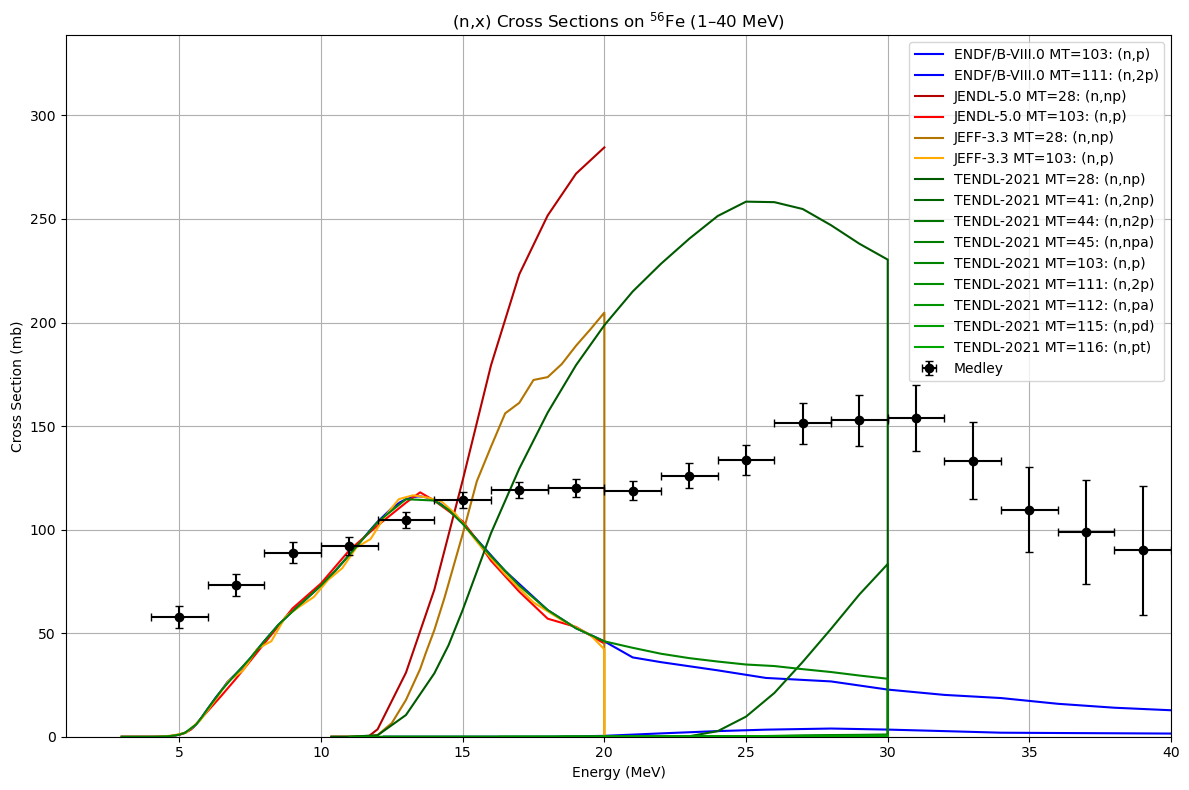

In [12]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_shades(color_base, n):
    base_rgb = np.array(mcolors.to_rgb(color_base))
    # Gera tons do mais escuro (70% do base) ao mais claro (130% do base)
    factors = np.linspace(0.7, 1.3, n)
    shades = []
    for f in factors:
        shade = np.clip(base_rgb * f, 0, 1)
        shades.append(shade)
    return shades

mt_names = {
    28: "(n,np)",
    41: "(n,2np)",
    42: "(n,3np)",
    44: "(n,n2p)",
    45: "(n,npa)",
    103: "(n,p)",
    111: "(n,2p)",
    112: "(n,pa)",
    115: "(n,pd)",
    116: "(n,pt)"
}


mt_list = [28, 41, 42, 44, 45, 103, 111,112, 115, 116]



# Cores base para cada biblioteca
base_colors = {
    'ENDF': 'blue',
    'JENDL': 'red',
    'JEFF': 'orange',
    'TENDL': 'green'
}

# Gerar listas de cores com variações para cada MT
colors_endf = generate_shades(base_colors['ENDF'], len(mt_list))
colors_jendl = generate_shades(base_colors['JENDL'], len(mt_list))
colors_jeff = generate_shades(base_colors['JEFF'], len(mt_list))
colors_tendl = generate_shades(base_colors['TENDL'], len(mt_list))

#colors_jendl = ['red', 'darkorange', 'seagreen', 'navy', 'purple', 'firebrick', 'teal', 'brown', 'gray']
#colors_jeff = ['orange', 'gold', 'lime', 'cyan', 'magenta', 'salmon', 'olive', 'maroon', 'grey']
#colors_endf = ['blue'] * len(mt_list)
#colors_tendl = ['green'] * len(mt_list)

# === ENDF/B-VIII.0 ===
endf_path = '../ENDF-B-VIII.0_neutrons/n-026_Fe_056.endf'
tape_endf = ENDFtk.tree.Tape.from_file(endf_path)
material_endf = tape_endf.material(2631).file(3)
    
# === JENDL-5.0 ===
tape_jendl = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')
material_jendl = tape_jendl.material(2631).file(3)

# === JEFF-3.3 ===
tape_jeff = ENDFtk.tree.Tape.from_file('/mnt/medley/LucasAnalysis/JEFF33-n/endf6/26-Fe-56g.jeff33')
material_jeff = tape_jeff.material(2631).file(3)

# === TENDL-2021 ===
tape_tendl = ENDFtk.tree.Tape.from_file('Fe056_tendl.endf')
material_tendl = tape_tendl.material(2631).file(3)

# === Medley experimental data ===
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
ex = np.ones_like(x)  # ±1 MeV
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])  # mb

plt.figure(figsize=(12, 8))

# Função auxiliar para plotar MTs disponíveis
def plot_mt(material, mt_list, colors, label_prefix):
    for mt, color in zip(mt_list, colors):
        try:
            section = material.section(mt).parse()
            energies = np.array(section.energies) * 1e-6  # eV -> MeV
            xs = np.array(section.cross_sections) * 1e3   # barns -> mb
            mask = (energies >= 1) & (energies <= 40)
            if np.any(mask):
                reaction_name = mt_names.get(mt, "")
                plt.plot(energies[mask], xs[mask], label=f'{label_prefix} MT={mt}: {reaction_name}', color=color)
        except Exception:
            pass

# Plot ENDF MTs
plot_mt(material_endf, mt_list, colors_endf, 'ENDF/B-VIII.0')

# Plot JENDL MTs
plot_mt(material_jendl, mt_list, colors_jendl, 'JENDL-5.0')

# Plot JEFF MTs
plot_mt(material_jeff, mt_list, colors_jeff, 'JEFF-3.3')

# Plot TENDL MTs
plot_mt(material_tendl, mt_list, colors_tendl, 'TENDL-2021')

# Plot Medley experimental data
plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o', color='black', label='Medley', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title(r'(n,x) Cross Sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*2.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


[error] The requested section (MF3 MT28) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
[error] The requested section (MF3 MT112) is not present in the ENDF file tree
[error] The requested section (MF3 MT115) is not present in the ENDF file tree
[error] The requested section (MF3 MT116) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
[error] The requested section (MF3 MT111) is not present in t

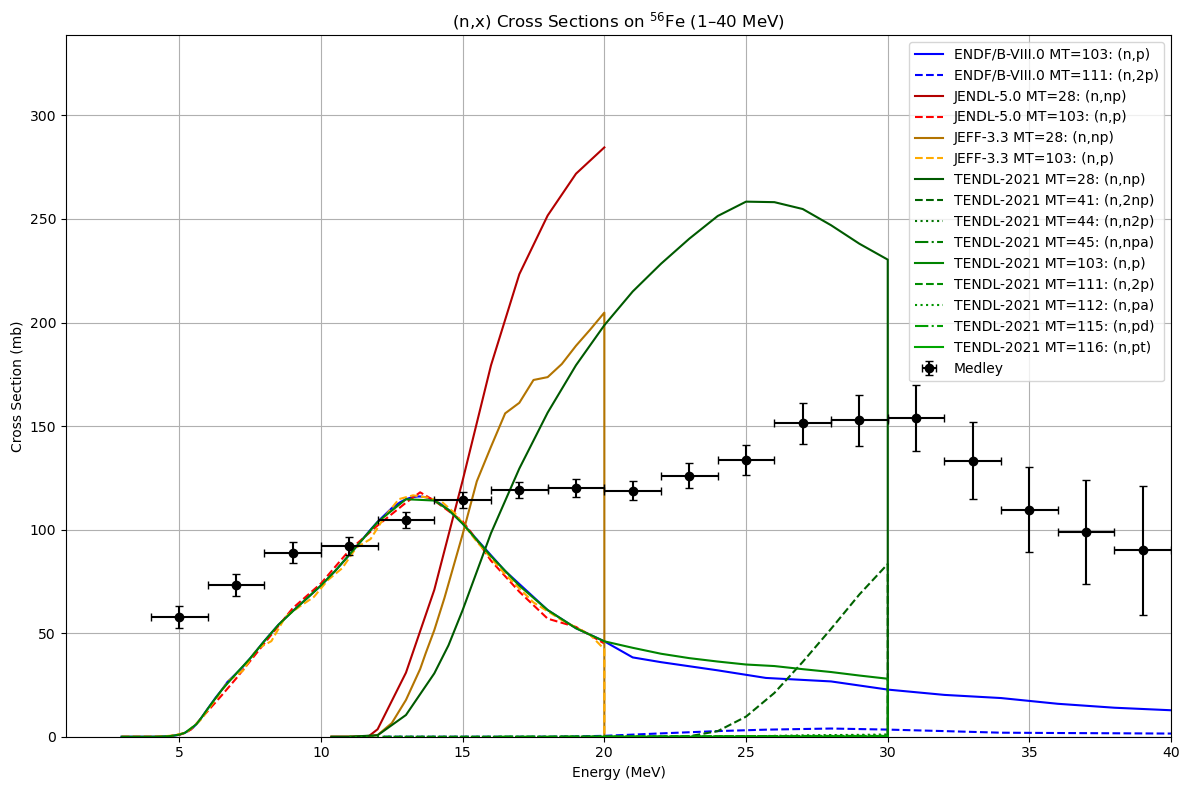

In [3]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_shades(color_base, n):
    base_rgb = np.array(mcolors.to_rgb(color_base))
    factors = np.linspace(0.7, 1.3, n)
    shades = []
    for f in factors:
        shade = np.clip(base_rgb * f, 0, 1)
        shades.append(shade)
    return shades

mt_names = {
    28: "(n,np)",
    41: "(n,2np)",
    42: "(n,3np)",
    44: "(n,n2p)",
    45: "(n,npa)",
    103: "(n,p)",
    111: "(n,2p)",
    112: "(n,pa)",
    115: "(n,pd)",
    116: "(n,pt)"
}

mt_list = [28, 41, 42, 44, 45, 103, 111, 112, 115, 116]

base_colors = {
    'ENDF': 'blue',
    'JENDL': 'red',
    'JEFF': 'orange',
    'TENDL': 'green'
}

colors_endf = generate_shades(base_colors['ENDF'], len(mt_list))
colors_jendl = generate_shades(base_colors['JENDL'], len(mt_list))
colors_jeff = generate_shades(base_colors['JEFF'], len(mt_list))
colors_tendl = generate_shades(base_colors['TENDL'], len(mt_list))

# Estilos de linha para rotacionar
line_styles = ['solid', 'dashed', 'dotted', 'dashdot']

endf_path = '../ENDF-B-VIII.0_neutrons/n-026_Fe_056.endf'
tape_endf = ENDFtk.tree.Tape.from_file(endf_path)
material_endf = tape_endf.material(2631).file(3)

tape_jendl = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')
material_jendl = tape_jendl.material(2631).file(3)

tape_jeff = ENDFtk.tree.Tape.from_file('/mnt/medley/LucasAnalysis/JEFF33-n/endf6/26-Fe-56g.jeff33')
material_jeff = tape_jeff.material(2631).file(3)

tape_tendl = ENDFtk.tree.Tape.from_file('Fe056_tendl.endf')
material_tendl = tape_tendl.material(2631).file(3)

x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
ex = np.ones_like(x)
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])

plt.figure(figsize=(12, 8))

def plot_mt(material, mt_list, colors, label_prefix):
    style_count = len(line_styles)
    idx = 0
    for mt, color in zip(mt_list, colors):
        try:
            section = material.section(mt).parse()
            energies = np.array(section.energies) * 1e-6
            xs = np.array(section.cross_sections) * 1e3
            mask = (energies >= 1) & (energies <= 40)
            if np.any(mask):
                reaction_name = mt_names.get(mt, "")
                style = line_styles[idx % style_count]
                plt.plot(energies[mask], xs[mask],
                         label=f'{label_prefix} MT={mt}: {reaction_name}',
                         color=color,
                         linestyle=style)
                idx += 1
        except Exception:
            pass

plot_mt(material_endf, mt_list, colors_endf, 'ENDF/B-VIII.0')
plot_mt(material_jendl, mt_list, colors_jendl, 'JENDL-5.0')
plot_mt(material_jeff, mt_list, colors_jeff, 'JEFF-3.3')
plot_mt(material_tendl, mt_list, colors_tendl, 'TENDL-2021')

plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o', color='black', label='Medley', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title(r'(n,x) Cross Sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*2.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


[error] The requested section (MF3 MT107) is not present in the ENDF file tree
[error] The requested section (MF3 MT108) is not present in the ENDF file tree
[error] The requested section (MF3 MT108) is not present in the ENDF file tree
[error] The requested section (MF3 MT108) is not present in the ENDF file tree


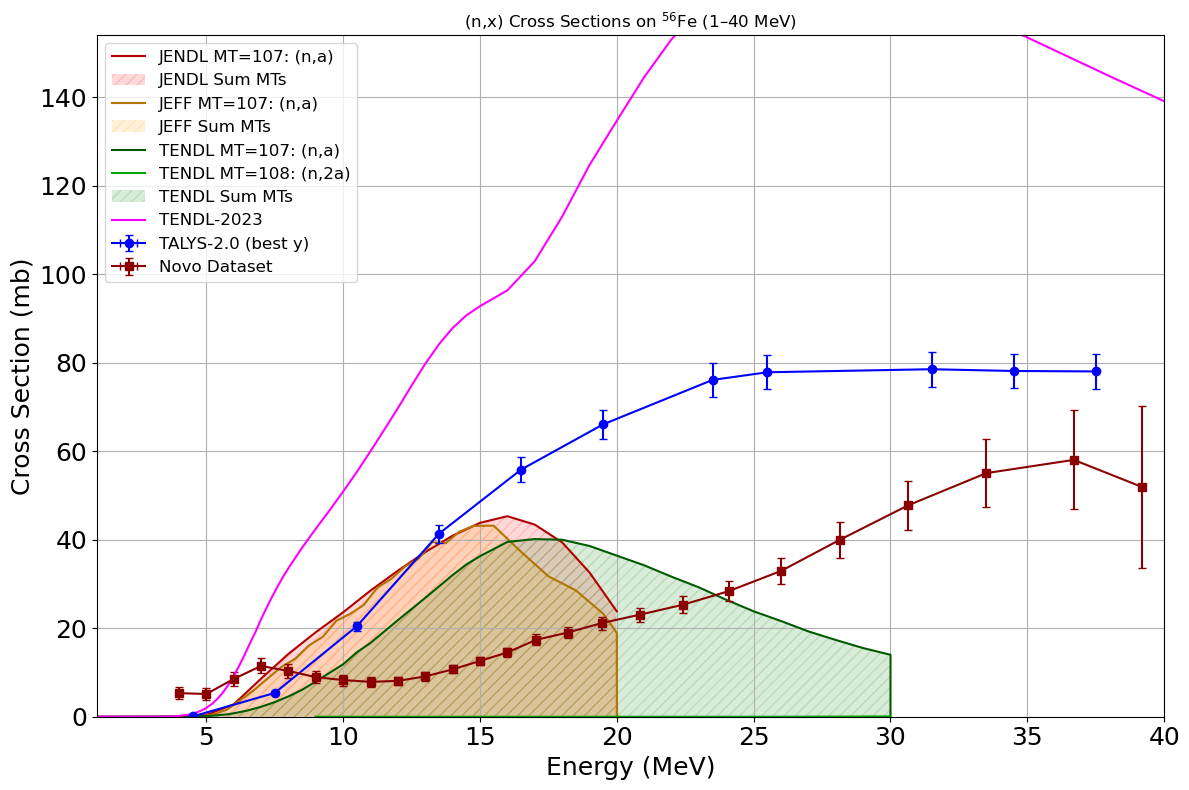

In [6]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_shades(color_base, n):
    base_rgb = np.array(mcolors.to_rgb(color_base))
    factors = np.linspace(0.7, 1.3, n)
    shades = []
    for f in factors:
        shade = np.clip(base_rgb * f, 0, 1)
        shades.append(shade)
    return shades

mt_names = {
    107: "(n,a)",
    108: "(n,2a)",
}

mt_list = [107,108]

base_colors = {
    'ENDF': 'blue',
    'JENDL': 'red',
    'JEFF': 'orange',
    'TENDL': 'green'
}

colors_endf = generate_shades(base_colors['ENDF'], len(mt_list))
colors_jendl = generate_shades(base_colors['JENDL'], len(mt_list))
colors_jeff = generate_shades(base_colors['JEFF'], len(mt_list))
colors_tendl = generate_shades(base_colors['TENDL'], len(mt_list))

# Carregar arquivos e materiais
endf_path = '../ENDF-B-VIII.0_neutrons/n-026_Fe_056.endf'
tape_endf = ENDFtk.tree.Tape.from_file(endf_path)
material_endf = tape_endf.material(2631).file(3)

tape_jendl = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')
material_jendl = tape_jendl.material(2631).file(3)

tape_jeff = ENDFtk.tree.Tape.from_file('/mnt/medley/LucasAnalysis/JEFF33-n/endf6/26-Fe-56g.jeff33')
material_jeff = tape_jeff.material(2631).file(3)

tape_tendl = ENDFtk.tree.Tape.from_file('Fe056_tendl.endf')
material_tendl = tape_tendl.material(2631).file(3)

# Dados experimentais
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])
ex = np.ones_like(x)
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])

plt.figure(figsize=(12, 8))

def plot_mt(material, mt_list, colors, label_prefix):
    energy_grid = np.linspace(1, 40, 400)
    sum_xs = np.zeros_like(energy_grid)
    plotted_any = False
    
    for mt, color in zip(mt_list, colors):
        try:
            section = material.section(mt).parse()
            energies = np.array(section.energies) * 1e-6  # eV -> MeV
            xs = np.array(section.cross_sections) * 1e3   # barns -> mb
            mask = (energies >= 1) & (energies <= 40)
            if not np.any(mask):
                continue
            
            # Plot individual MT
            plt.plot(energies[mask], xs[mask], label=f'{label_prefix} MT={mt}: {mt_names.get(mt, "")}', color=color)
            
            # Interpola para o grid comum
            xs_interp = np.interp(energy_grid, energies[mask], xs[mask], left=0, right=0)
            sum_xs += xs_interp
            plotted_any = True
        except Exception:
            pass
    
    # Plotar soma se houver pelo menos um MT encontrado
    if plotted_any:
        plt.fill_between(energy_grid, sum_xs, color=base_colors[label_prefix.split()[0]], alpha=0.15,
                         hatch='///', edgecolor=base_colors[label_prefix.split()[0]], linewidth=0.0,
                         label=f'{label_prefix} Sum MTs')

# Plotar todas bibliotecas
plot_mt(material_endf, mt_list, colors_endf, 'ENDF')
plot_mt(material_jendl, mt_list, colors_jendl, 'JENDL')
plot_mt(material_jeff, mt_list, colors_jeff, 'JEFF')
plot_mt(material_tendl, mt_list, colors_tendl, 'TENDL')

#plt.errorbar(x, y, xerr=ex/np.sqrt(12), yerr=ey, fmt='o', color='black', label='Medley', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.xlabel('Energy (MeV)', fontsize=18)     # Tamanho do label eixo x
plt.ylabel('Cross Section (mb)', fontsize=18)  # Tamanho do label eixo y

plt.xticks(fontsize=18)  # Tamanho dos números do eixo x
plt.yticks(fontsize=18)  # Tamanho dos números do eixo y

plt.title(r'(n,x) Cross Sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*1.0)
plt.grid(True)
#plt.legend(fontsize=14, loc='best', frameon=True)

slypen_energy = np.array([25.5, 28.5, 31.5, 34.5, 37.5, 41.0, 45.0, 49.0, 53.5, 62.7])
slypen_energy_err = np.array([1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.5, 2.0])
slypen_xs = np.array([244.1, 331.0, 364.1, 392.4, 417.0, 446.2, 490.7, 576.5, 564.3, 543.9])
slypen_xs_err = np.array([39.2, 39.6, 43.8, 55.2, 50.1, 52.0, 56.3, 67.7, 69.9, 34.8])



x_custom = np.array([4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 23.5, 25.5, 31.5, 34.5, 37.5])
y_custom = np.array([6.394142e-2, 5.373140, 20.44624, 41.34773, 55.82178,
                     66.04889, 76.08958, 77.81510, 78.50262, 78.10765, 78.00629])

# Sem incerteza no eixo x (valores zerados)
ex_custom = np.zeros_like(x_custom)

# Aqui você pode colocar incertezas fictícias ou reais no eixo y, se disponíveis.
# Para exemplo, vou usar 5% do valor de y como incerteza
ey_custom = y_custom * 0.05

# Plot
plt.errorbar(
    x_custom,
    y_custom,
    xerr=ex_custom,
    yerr=ey_custom,
    marker='o',
    linestyle='-',
    color='blue',
    label='TALYS-2.0 (best y)',
    capsize=3,
    markersize=6
)

# Dados fornecidos
x_data = np.array([
    4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
    14, 15, 16, 17.05, 18.2, 19.45, 20.85,
    22.4, 24.1, 26, 28.15, 30.65, 33.5,
    36.7, 39.2
])

y_data = np.array([
    5.33328, 5.12841, 8.54053, 11.4717, 10.3327, 8.94094, 8.27782, 7.87745,
    8.09941, 9.11101, 10.6976, 12.5973, 14.529, 17.3678, 19.0102, 21.1569,
    23.0673, 25.2729, 28.3911, 32.9335, 39.9742, 47.7672, 55.0288, 58.0227, 51.8837
])

ey_data = np.array([
    1.40091, 1.34453, 1.53402, 1.68261, 1.54336, 1.35896, 1.25926, 1.07974,
    0.960979, 0.93364, 0.923495, 0.986953, 1.08347, 1.20935, 1.29975,
    1.47262, 1.59521, 1.91832, 2.32745, 3.02114, 4.08672, 5.55827,
    7.73116, 11.1883, 18.2073
])

ex_data = np.zeros_like(x_data)  # Sem incerteza no eixo X

# Plotando
plt.errorbar(
    x_data,
    y_data,
    xerr=ex_data,
    yerr=ey_data,
    marker='s',
    linestyle='-',
    color='darkred',
    label='Novo Dataset',
    capsize=3,
    markersize=6
)


# === TENDL (arquivo aprod-nxAlpha.tot) ===
data_tendl = []
with open('aprod-nxAlpha.tot', 'r') as f:
    for line in f:
        line = line.strip()
        if line.startswith('#') or len(line) == 0:
            continue
        parts = line.split()
        if len(parts) >= 2:
            E = float(parts[0])      # MeV
            xs = float(parts[1])     # mb
            data_tendl.append((E, xs))
data_tendl = np.array(data_tendl)
energies_tendl = data_tendl[:, 0]
cross_sections_tendl = data_tendl[:, 1]


# TENDL
plt.plot(energies_tendl, cross_sections_tendl, label='TENDL-2023', color='magenta')

plt.legend(fontsize=12, loc='upper left', frameon=True)
#plt.legend()
plt.tight_layout()
plt.show()



In [32]:
plt.errorbar(
    slypen_energy,
    slypen_xs,
    xerr=slypen_energy_err / np.sqrt(12),  # If you want consistent error scaling like the Medley data
    yerr=slypen_xs_err,
    fmt='s',
    color='purple',
    label='I.Slypen+ 2004',
    capsize=3,
    markersize=6,
    linestyle='none'
)
# TALYS-2.0 data
energy_talys = np.array([4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 23.5, 25.5, 31.5, 34.5, 37.5])
xs_talys = np.array([0.06606213, 34.45998, 117.5349, 192.1412, 237.6827,
                     263.0302, 285.3689, 295.9233, 326.4403, 356.3955, 383.4188])

plt.plot(
    energy_talys,
    xs_talys,
    'D-',  # Diamond markers with a solid line
    color='red',
    label='TALYS-2.0',
    linewidth=2,
    markersize=6
)
# Medley2 dataset
x_medley2 = np.array([10, 14.9812, 20.0094, 24.9906, 30.0188, 35])
y_medley2 = np.array([153.434, 203.402, 226.213, 251.74, 307.139, 201.23])
ex_medley2 = np.zeros_like(x_medley2)
ey_medley2 = np.array([23.2104, 26.6542, 27.836, 29.1052, 31.4231, 24.9104])

plt.errorbar(
    x_medley2,
    y_medley2,
    xerr=ex_medley2,
    yerr=ey_medley2,
    marker='^',
    linestyle='-',
    color='black',
    label='Medley (forward angles)',
    capsize=3,
    markersize=6,
    #linestyle='none'
)



3.4641016151377544

ENDF - Found MTs: MT=103 ((n,p)), MT=111 ((n,2p))
[error] The requested section (MF3 MT28) is not present in the ENDF file tree
JENDL - Found MTs: MT=28 ((n,np)), MT=103 ((n,p))
JEFF - Found MTs: MT=28 ((n,np)), MT=103 ((n,p))
TENDL - Found MTs: MT=28 ((n,np)), MT=41 ((n,2np)), MT=44 ((n,n2p)), MT=45 ((n,npa)), MT=103 ((n,p)), MT=111 ((n,2p)), MT=112 ((n,pa)), MT=115 ((n,pd)), MT=116 ((n,pt))
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
[error] The requested section (MF3 MT112) is not present in the ENDF file tree
[error] The requested section (MF3 MT115) is not present in the ENDF file tree
[error] The requested section (MF3 MT116) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present

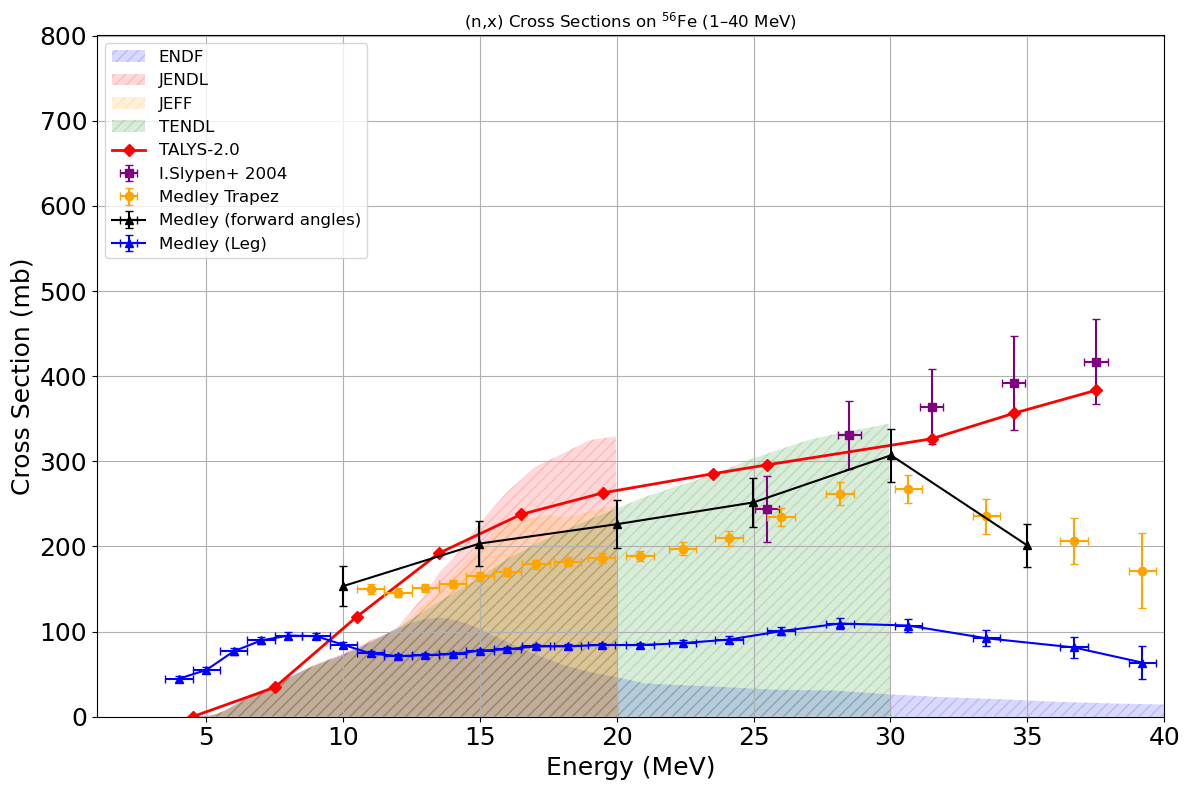

In [3]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_shades(color_base, n):
    base_rgb = np.array(mcolors.to_rgb(color_base))
    factors = np.linspace(0.7, 1.3, n)
    shades = []
    for f in factors:
        shade = np.clip(base_rgb * f, 0, 1)
        shades.append(shade)
    return shades

mt_names = {
    28: "(n,np)",
    41: "(n,2np)",
    42: "(n,3np)",
    44: "(n,n2p)",
    45: "(n,npa)",
    103: "(n,p)",
    111: "(n,2p)",
    112: "(n,pa)",
    115: "(n,pd)",
    116: "(n,pt)"
}

mt_list = [28, 41, 42, 44, 45, 103, 111, 112, 115, 116]

base_colors = {
    'ENDF': 'blue',
    'JENDL': 'red',
    'JEFF': 'orange',
    'TENDL': 'green'
}

colors_endf = generate_shades(base_colors['ENDF'], len(mt_list))
colors_jendl = generate_shades(base_colors['JENDL'], len(mt_list))
colors_jeff = generate_shades(base_colors['JEFF'], len(mt_list))
colors_tendl = generate_shades(base_colors['TENDL'], len(mt_list))

# Carregar arquivos e materiais
endf_path = '../ENDF-B-VIII.0_neutrons/n-026_Fe_056.endf'
tape_endf = ENDFtk.tree.Tape.from_file(endf_path)
material_endf = tape_endf.material(2631).file(3)

tape_jendl = ENDFtk.tree.Tape.from_file('Fe056_jendl5.endf')
material_jendl = tape_jendl.material(2631).file(3)

tape_jeff = ENDFtk.tree.Tape.from_file('/mnt/medley/LucasAnalysis/JEFF33-n/endf6/26-Fe-56g.jeff33')
material_jeff = tape_jeff.material(2631).file(3)

tape_tendl = ENDFtk.tree.Tape.from_file('Fe056_tendl.endf')
material_tendl = tape_tendl.material(2631).file(3)

# Dados experimentais
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])
ex = np.ones_like(x)
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])

plt.figure(figsize=(12, 8))
def plot_mt(material, mt_list, colors, label_prefix):
    energy_grid = np.linspace(1, 40, 400)
    sum_xs = np.zeros_like(energy_grid)
    found_mts = []

    for mt in mt_list:
        try:
            section = material.section(mt).parse()
            energies = np.array(section.energies) * 1e-6  # eV -> MeV
            xs = np.array(section.cross_sections) * 1e3   # barns -> mb
            mask = (energies >= 1) & (energies <= 40)
            if not np.any(mask):
                continue

            found_mts.append(mt)

            # Interpola para o grid comum
            xs_interp = np.interp(energy_grid, energies[mask], xs[mask], left=0, right=0)
            sum_xs += xs_interp

        except Exception:
            continue

    # Exibir MTs encontrados
    if found_mts:
        mt_strs = [f'MT={mt} ({mt_names.get(mt, "unknown")})' for mt in found_mts]
        print(f'{label_prefix} - Found MTs:', ', '.join(mt_strs))

        # Plotar apenas a soma com legenda simplificada
        plt.fill_between(
            energy_grid,
            sum_xs,
            color=base_colors[label_prefix.split()[0]],
            alpha=0.15,
            hatch='///',
            edgecolor=base_colors[label_prefix.split()[0]],
            linewidth=0.0,
            label=f'{label_prefix}'  # <- só "TENDL", "ENDF", etc.
        )
        
# Plotar todas bibliotecas
plot_mt(material_endf, mt_list, colors_endf, 'ENDF')
plot_mt(material_jendl, mt_list, colors_jendl, 'JENDL')
plot_mt(material_jeff, mt_list, colors_jeff, 'JEFF')
plot_mt(material_tendl, mt_list, colors_tendl, 'TENDL')

#plt.errorbar(x, y, xerr=ex/np.sqrt(12), yerr=ey, fmt='o', color='black', label='Medley', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.xlabel('Energy (MeV)', fontsize=18)     # Tamanho do label eixo x
plt.ylabel('Cross Section (mb)', fontsize=18)  # Tamanho do label eixo y

plt.xticks(fontsize=18)  # Tamanho dos números do eixo x
plt.yticks(fontsize=18)  # Tamanho dos números do eixo y

plt.title(r'(n,x) Cross Sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*5.2)
plt.grid(True)
#plt.legend(fontsize=14, loc='best', frameon=True)

slypen_energy = np.array([25.5, 28.5, 31.5, 34.5, 37.5, 41.0, 45.0, 49.0, 53.5, 62.7])
slypen_energy_err = np.array([1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.5, 2.0])
slypen_xs = np.array([244.1, 331.0, 364.1, 392.4, 417.0, 446.2, 490.7, 576.5, 564.3, 543.9])
slypen_xs_err = np.array([39.2, 39.6, 43.8, 55.2, 50.1, 52.0, 56.3, 67.7, 69.9, 34.8])

plt.errorbar(
    slypen_energy,
    slypen_xs,
    xerr=slypen_energy_err / np.sqrt(12),  # If you want consistent error scaling like the Medley data
    yerr=slypen_xs_err,
    fmt='s',
    color='purple',
    label='I.Slypen+ 2004',
    capsize=3,
    markersize=6,
    linestyle='none'
)
# TALYS-2.0 data
energy_talys = np.array([4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 23.5, 25.5, 31.5, 34.5, 37.5])
xs_talys = np.array([0.06606213, 34.45998, 117.5349, 192.1412, 237.6827,
                     263.0302, 285.3689, 295.9233, 326.4403, 356.3955, 383.4188])

plt.plot(
    energy_talys,
    xs_talys,
    'D-',  # Diamond markers with a solid line
    color='red',
    label='TALYS-2.0',
    linewidth=2,
    markersize=6
)

#Medley updated dataset

#x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
#y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
#              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
#ex = np.ones_like(x)
#ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
#               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])

##new result Legendre:: 
#x = np.array([ 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
#y = np.array([ 34.3036, 45.927, 53.4543, 47.5693, 54.803, 60.4171, 65.212, 64.0738,
#              62.697, 66.4615, 69.9978, 79.3933, 89.6667, 78.0086, 67.2336, 56.7912, 51.7983, 48.4602])  # mb
#ex = np.ones_like(x)
#ey = np.array([ 1.30414, 1.22321, 1.13552, 1.00747, 0.96011, 0.95668, 1.03612, 1.1657,
#               1.35859, 1.73273, 2.21133, 3.05064, 3.8287, 5.07871, 5.90201, 6.67658, 8.01108, 9.23071])

#x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
#y = np.array([69.173, 83.9294, 101.155, 110.753, 127.983, 137.448, 143.432, 144.305, 145.229,
#              156.358, 166.396, 191.201, 195.22, 207.661, 183.872, 150.364, 140.354, 132.931])  # mb
#ex = np.ones_like(x)/2
#ey = np.array([2.66275, 2.37933, 2.20702, 2.04383, 2.00125, 2.01119, 2.19727, 2.49178,
#               2.94116, 3.78196, 4.85676, 6.67792, 8.37145, 11.2167, 13.0679, 14.5427, 17.4018, 21.161])

# Dados principais ##quarta feira:: 
#x = np.array([
#    5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
#    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
#    35, 36, 37, 38, 39
#])  # MeV

#y = np.array([
#    213.586, 332.314, 351.718, 307.924, 242.944, 196.799, 173.106, 169.822,
#    176.475, 179.688, 187.833, 190.865, 198.324, 197.849, 201.353, 201.364,
#    202.546, 210.16, 216.118, 223.65, 233.793, 250.32, 268.021, 273.791,
#    278.124, 275.746, 297.04, 263.832, 268.269, 238.076, 217.663, 188.748,
#    205.529, 192.378, 188.036
#])  # mb

# Erros
#ex = np.ones_like(x) / 2  # erro simétrico de 0.5 MeV

#ey = np.array([
#    6.94193, 8.11916, 8.24135, 7.51653, 6.48259, 5.43182, 4.71292, 4.24731,
#    3.95889, 3.81669, 3.90633, 3.97603, 4.28872, 4.47568, 4.8502, 5.24937,
#    5.73041, 6.48756, 7.31969, 8.27629, 9.44862, 11.0627, 13.0704, 14.494,
#    16.4473, 18.1907, 22.0168, 22.5076, 25.8623, 26.9404, 28.7278, 28.6004,
#    34.3883, 37.0851, 42.1586
#])  # erro associado a y
# Dados principais

# Dados principais
x = np.array([
    4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17.05, 18.2, 19.45, 20.85,
    22.4, 24.1, 26, 28.15, 30.65, 33.5, 36.7, 39.2
])  # MeV

y = np.array([
    113.769, 176.165, 273.936, 294.495, 259.369, 207.162, 168.241, 150.304,
    145.755, 151.409, 155.84, 164.757, 170.026, 179.101, 181.999, 186.541,
    188.936, 197.595, 209.404, 234.861, 261.98, 267.964, 235.619, 206.345, 171.765
])  # mb

# Erros
ex = np.full_like(x, 0.5)  # erro simétrico de 0.5 MeV

ey = np.array([
    7.66151, 8.80772, 10.2062, 10.4558, 9.55618, 8.25317, 6.9406, 6.05741,
    5.45295, 5.07317, 4.89871, 5.04049, 5.20386, 5.3847, 5.49857, 5.90598,
    6.21581, 7.22788, 8.42792, 10.5652, 13.4378, 16.5608, 20.4038, 26.5622, 43.9708
])  

plt.errorbar(
    x[7:],
    y[7:],
    xerr=ex[7:],
    yerr=ey[7:],
    marker='o',
    linestyle='none',
    color='orange',
    #label='Medley Legendre\'s fits',
    label='Medley Trapez',
    capsize=3,
    markersize=6,
    #linestyle='none'
)

# Medley2 dataset
x_medley2 = np.array([10, 14.9812, 20.0094, 24.9906, 30.0188, 35])
y_medley2 = np.array([153.434, 203.402, 226.213, 251.74, 307.139, 201.23])
ex_medley2 = np.zeros_like(x_medley2)
ey_medley2 = np.array([23.2104, 26.6542, 27.836, 29.1052, 31.4231, 24.9104])

plt.errorbar(
    x_medley2,
    y_medley2,
    xerr=ex_medley2,
    yerr=ey_medley2,
    marker='^',
    linestyle='-',
    color='black',
    label='Medley (forward angles)',
    capsize=3,
    markersize=6,
    #linestyle='none'
)


# Energia incidente (MeV)
En = np.array([
    4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17.05, 18.2, 19.45,
    20.85, 22.4, 24.1, 26, 28.15, 30.65, 33.5, 36.7, 39.2
])

# Integral da distribuição angular (mb)
int_mb = np.array([
    44.7119, 54.9486, 76.8464, 89.5795, 95.3018, 94.6579, 84.576,
    74.3424, 71.1749, 72.3482, 73.5345, 77.5855, 79.2385, 82.6608,
    82.7162, 84.3094, 84.1821, 86.4467, 90.6194, 100.508, 109.484,
    107.133, 92.1709, 81.3944, 63.6147
])

Ey = np.array([
    3.43569, 3.51254, 3.78954, 3.91344, 3.8731, 3.65477, 3.2847,
    2.93459, 2.69658, 2.52613, 2.41954, 2.47167, 2.52608, 2.61101,
    2.64478, 2.84033, 2.97978, 3.4202, 3.96566, 4.99069, 6.31894,
    7.80379, 9.43335, 12.3929, 19.132
])

Ex = np.full_like(Ey, 0.5)  # erro simétrico de 0.5 MeV

plt.errorbar(
    En,
    int_mb,
    xerr=Ex,
    yerr=Ey,
    marker='^',
    linestyle='-',
    color='Blue',
    label='Medley (Leg)',
    capsize=3,
    markersize=6,
    #linestyle='none'
)


plt.legend(fontsize=12, loc='upper left', frameon=True)
#plt.legend()
plt.tight_layout()
plt.show()
